# TP noté -- Statistical models for decision making - partie 2

Noms:  ***Pouré Thomas***; ***Ramilison Hugo***


## Exercice 1

Nous souhaitons évaluer si un nouveau produit a un effet significatif sur le rendement de moteurs. Pour y répondre, ce rendement (*Efficiency*) a été mesuré sur deux types de moteurs (*Brand_1* et *Brand_2*) et en testant différents niveaux de concentration (*Concentration*) du produit. Les observations sont dans le fichier *E2_Efficiency_Obs.csv*. Plus spécifiquement, nous nous demandons :
- Le produit semble-t-il avoir un effet ?
- Cet effet est-il différent en fonction de la marque du moteur ?
- Cet effet dépend-il de la concentration du produit ?

### Question 1.1 

Ouvrez et observez les données. A leur vue, quelle vous semble être la réponse aux trois questions posées plus haut ?

In [2]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

dataframe=pandas.read_csv("./E1_Efficiency_Obs.csv",sep=',')

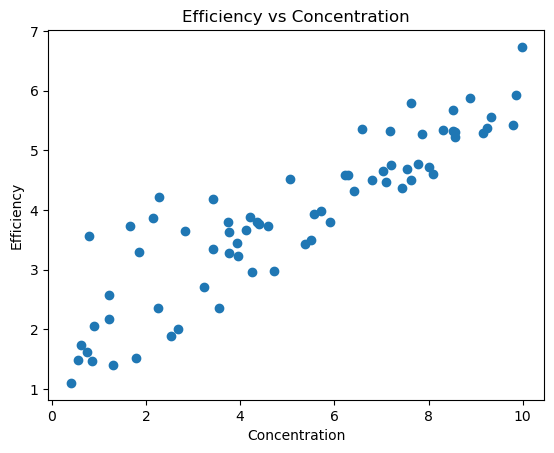

In [3]:
# Visualize raw data

dataframe=dataframe.dropna()
dataframe.head()

X=dataframe['Concentration'].values
y=dataframe['Efficiency'].values

plt.scatter(X,y)
plt.xlabel('Concentration')
plt.ylabel('Efficiency')
plt.title('Efficiency vs Concentration')
plt.show()


Mean efficency for Brand_1: 3.75
Standard deviation for Brand_1: 1.4
Mean efficency for Brand_2: 4.22
Standard deviation for Brand_2: 1.07


Text(0.5, 1.0, 'Efficiency vs Concentration by Brand')

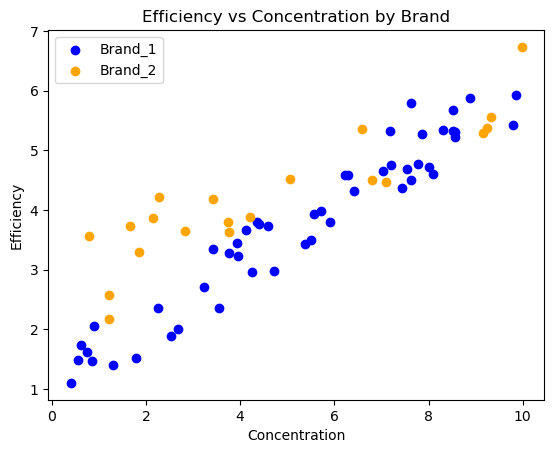

In [4]:
# Separate values by brand

brands = dataframe['Brand'].unique()
colors = ['blue', 'orange']

# Scatter plot
for brand, color in zip(brands, colors):
    subset = dataframe[dataframe['Brand'] == brand]
    print(f"Mean efficency for {brand}: {round(subset['Efficiency'].mean(), 2)}")
    print(f"Standard deviation for {brand}: {round(subset['Efficiency'].std(), 2)}")
    plt.scatter(subset['Concentration'], subset['Efficiency'], label=brand, color=color)

plt.xlabel('Concentration')
plt.ylabel('Efficiency')
plt.legend()
plt.title('Efficiency vs Concentration by Brand')


Median efficency for Brand_1: 3.79
Q1 for Brand_1: 2.77
Q3 for Brand_1: 4.75
Median efficency for Brand_2: 4.03
Q1 for Brand_2: 3.65
Q3 for Brand_2: 4.72


/tmp/ipykernel_1512/4007071485.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([dataframe[dataframe['Brand'] == brand]['Efficiency'] for brand in brands], labels=brands)


Text(0.5, 1.0, 'Efficiency Distribution by Brand')

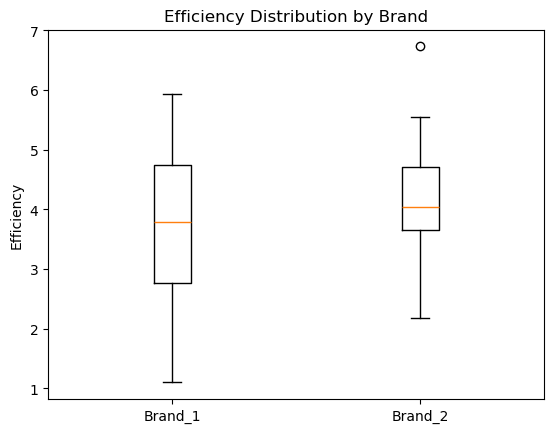

In [5]:
# Box plot
for brand, color in zip(brands, colors):
    subset = dataframe[dataframe['Brand'] == brand]
    print(f"Median efficency for {brand}: {round(subset['Efficiency'].median(), 2)}")
    print(f"Q1 for {brand}: {round(subset['Efficiency'].quantile(0.25), 2)}")
    print(f"Q3 for {brand}: {round(subset['Efficiency'].quantile(0.75), 2)}")

plt.boxplot([dataframe[dataframe['Brand'] == brand]['Efficiency'] for brand in brands], labels=brands)
plt.ylabel('Efficiency')
plt.title('Efficiency Distribution by Brand')



**Réponses**:

Nous avons en première instance choisi de faire un visualisation grossière des données avec un nuage de points représentant en abscisse le la concentration du produit et en ordonnée l'efficacité du moteur. L'analyse de ce graphique permet de formuler une première hypothèse:

>Il semble que l'efficacité d'un moteur est bien proportionnelle à la concentration du produit.

Ensuite, afin d'affiner les résultats au regard des deux marques de moteurs étudiées, nous avons différencié les points sur le premier graphe en fonction le marque de moteur qu'ils représentaient puis tracé les diagrammes en boites de chacuns des ensembles de valeurs.
Ainsi, nous pouvons remarquer que:

>Indépendamment de la marque du moteur, la concentration en produit semble bien avoir un effet positif sur leur efficacité et on peut même y supposer une relation linéaire.

Cependant, les valeurs des indicateurs statistiques de tendance centrale (moyenne et mediane) nous permettent de conjecturer une efficacité globale supérieure de la deuxième marque du moteur. Nous pouvons enfin remarquer une plus grande dispersion de l'efficacité de la première marque de moteur par rapport à la seconde sur les mêmes plages de concentration du produit, laissant donc supposer que pour des valeurs extrêmes de concentration, l'efficacité de la première marque de moteur suivra les mêmes tendances.

### Question 1.2 

Afin de répondre aux questions, deux hypothèses sont formulées :
- Pour chaque marque de moteur, la relation entre la concentration et le rendement est supposée linéaire.
- La distribution du bruit des observations est supposé suivre une loi Normale centrée.

Quelle démarche de modélisation statistique allez-vous utiliser pour répondre aux trois questions posées en introduction ? Une fois la démarche bien expliquée, testez la sur les données observées afin de conclure sur l'efficacité du produit.

**Réponse**

>Comme les erreurs d'observations sont supposés normalement distribuées et l'hypothèse de relation linéaire, nous allons réaliser une regression linéaire sur les observations

Afin d'observer l'effet de la concentration du produit, nous allons d'abord réaliser la regression linéaire sur l'ensemble des observations (indépendamment de la marque du moteur). Puis, afin d'affiner notre étude, nous allons séparer les observations en fonction de la marque du moteur et effectuer une regression linéaire sur celles-ci.

Coefficient de régression: 0.42, Intercept: 1.75

R2: 0.81


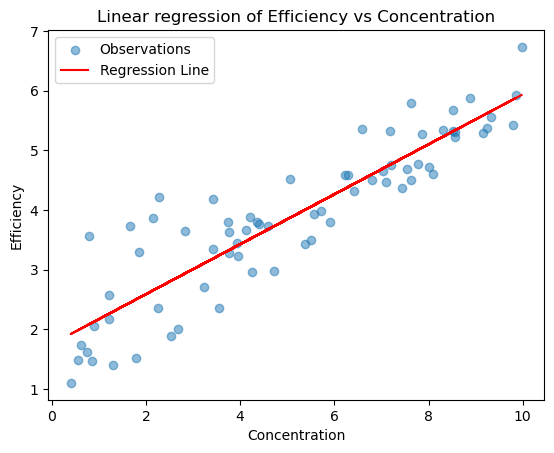

In [6]:
# Linear regression on all data

from sklearn.linear_model import LinearRegression

X_brand1 = dataframe[dataframe['Brand']=='Brand_1']['Concentration'].values
y_brand1 = dataframe[dataframe['Brand']=='Brand_1']['Efficiency'].values

X_brand2 = dataframe[dataframe['Brand']=='Brand_2']['Concentration'].values
y_brand2 = dataframe[dataframe['Brand']=='Brand_2']['Efficiency'].values

reg_lin = LinearRegression()
reg_lin.fit(X[:, np.newaxis], y)
y_pred = reg_lin.predict(X[:, np.newaxis])

print(f"Coefficient de régression: {round(reg_lin.coef_[0], 2)}, Intercept: {round(reg_lin.intercept_, 2)}\n")
print(f"R2: {round(reg_lin.score(X[:, np.newaxis], y), 2)}")
plt.scatter(X, y, label='Observations', alpha=0.5)
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('Concentration')
plt.ylabel('Efficiency')
plt.title('Linear regression of Efficiency vs Concentration')
plt.legend()

Brand 1 - Coefficient de régression: 0.49, Intercept: 1.15
Reg1 - R2: 0.93


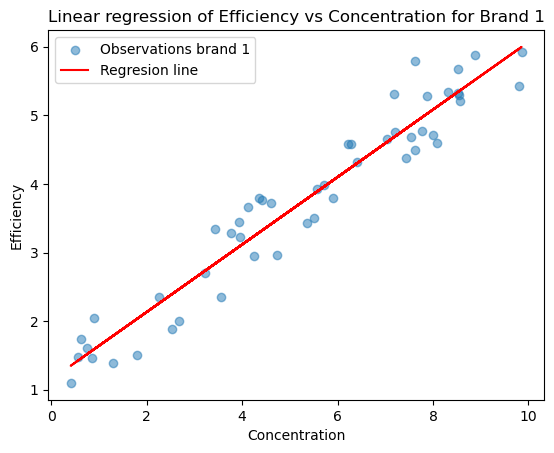

In [7]:
# Linear regression on brand 1 only

from sklearn.linear_model import LinearRegression

reg_lin_brand1 = LinearRegression()
reg_lin_brand1.fit(X_brand1[:, np.newaxis], y_brand1)
y_pred_brand1 = reg_lin_brand1.predict(X_brand1[:, np.newaxis])

plt.scatter(X_brand1, y_brand1, label='Observations brand 1', alpha=0.5)
plt.plot(X_brand1, y_pred_brand1, color='red', label='Regresion line')
plt.xlabel('Concentration')
plt.ylabel('Efficiency')
plt.title('Linear regression of Efficiency vs Concentration for Brand 1')
plt.legend()

print(f"Brand 1 - Coefficient de régression: {round(reg_lin_brand1.coef_[0], 2)}, Intercept: {round(reg_lin_brand1.intercept_, 2)}")
print(f"Reg1 - R2: {round(reg_lin_brand1.score(X_brand1[:, np.newaxis], y_brand1), 2)}")

Brand 2 - Coefficient de régression: 0.31, Intercept: 2.79
Reg2 - R2: 0.79


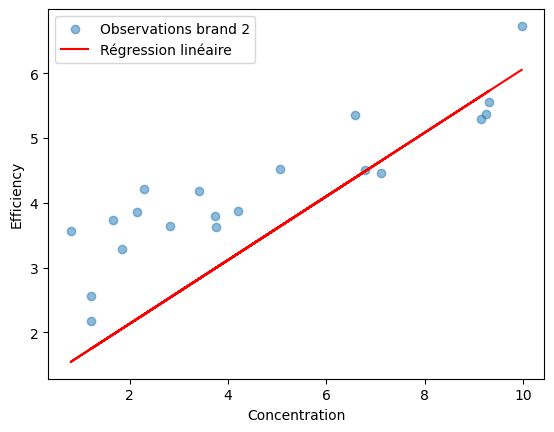

In [ ]:
from sklearn.linear_model import LinearRegression

reg_lin_brand2 = LinearRegression()
reg_lin_brand2.fit(X_brand2[:, np.newaxis], y_brand2)
y_pred_brand2 = reg_lin_brand1.predict(X_brand2[:, np.newaxis])

plt.scatter(X_brand2, y_brand2, label='Observations brand 2', alpha=0.5)
plt.plot(X_brand2, y_pred_brand2, color='red', label='Régression linéaire')
plt.xlabel('Concentration')
plt.ylabel('Efficiency')
plt.legend()

print(f"Brand 2 - Coefficient de régression: {round(reg_lin_brand2.coef_[0], 2)}, Intercept: {round(reg_lin_brand2.intercept_, 2)}")
print(f"Reg2 - R2: {round(reg_lin_brand2.score(X_brand2[:, np.newaxis], y_brand2), 2)}")

**Conclusions tirées de la modélisation**

>Grâce au calcul du coefficient du détermination (noté par la suite *R2*) sur l'ensemble des observation, nous pouvons conclure que le modèle linéaire est correctement ajusté aux valeurs mesurées car environ 81% de la variabilité est bien capturée.

Cependant, le résultat se nuance lorsque l'on sépare l'étude selon la marque de moteur. En effet, le calcul du *R2* pour la regression effectuée sur les valeurs correspondant uniquement à la marque 1 montre que le modèle linéaire est d'avantage ajusté pour celui ci que pour la marque 2. Car pour la première marque, 93% de la variabilité est capturée par un modèle linéaire contre 79% pour la seconde, ce qui reste néamoins correct pour tirer certaines conclusions.

>Le calcul de l'intercept pour les regressions linéaires séparées selon la marque du moteur, confirme l'efficacité globale supérieure de la marque 2, en revanche, le coefficient de regression montre que pour une même augmentation de concentration du produit, la première marque de moteur gagnera plus rapidement en efficacité comparée à la deuxieme.

## Exercice 2


Afin d'estimer efficacement le niveau de fatigue des ailes d'un d'avion au cours des années, il a été proposé de lancer une étude pour évaluer s'il était possible de déduire le niveau de stress subit par les ailes de l'avion lors de phases de vols diverses avec de données capteurs acquises en routine pendant les vols. Une personne ayant une expertise mécanique sur le modèle d'avion étudié a alors quantifié le niveau de stress subi par les ailes dans différentes phases de vols et différents contextes. Nous allons mettre en lien ces niveaux de stress avec des données capteurs acquises au même moment que les annotations. Nous allons pour cela utiliser la régression linaire. 


### QUESTION 2.1

Les données d'apprentissage sont dans les fichiers *E2_sensor_vals.csv* et *E2_stress_vals.csv*. Ouvrez ces fichiers et mettez les données dans des numpy arrays ou des pandas dataframes *X* et *Y*. Représentez alors le lien entre les valeurs issues de chaque capteur et le niveau de stress dans des nuages de points 2D. Identifiez-vous des relations entre des données capteur et le niveau de stress ? Quels capteurs vous paraissent être les plus pertinents.
 

   sensor_01  sensor_02  sensor_03  sensor_04  sensor_05  sensor_06  \
0       10.8        7.1       4.10        7.9       14.2       9.67   
1       10.8        7.1       5.58        7.7       12.5       9.93   
2       10.8        6.1       4.26        6.6       14.6      15.64   
3       11.0        4.4       3.37        5.5       13.3       8.31   
4       11.0        4.8       3.86        5.6       13.0       7.52   

   sensor_07  sensor_08  sensor_09  sensor_10  sensor_11  sensor_12  \
0      32.16      15.15  14.113333       0.24     0.2858  -3.092822   
1      28.30      11.90  11.180000       0.32     0.6628  -3.201752   
2      32.20       8.93   8.926667       0.44    -0.9030 -10.828537   
3      29.55      14.42  12.980000       0.26    -0.1893  -1.695580   
4      20.38       9.17   7.453333       0.19     0.6871  -4.242367   

   sensor_13  sensor_14   sensor_15  sensor_16  sensor_17  
0       9.57       0.24   72.131613       4.34       3.77  
1       8.00       0.29   

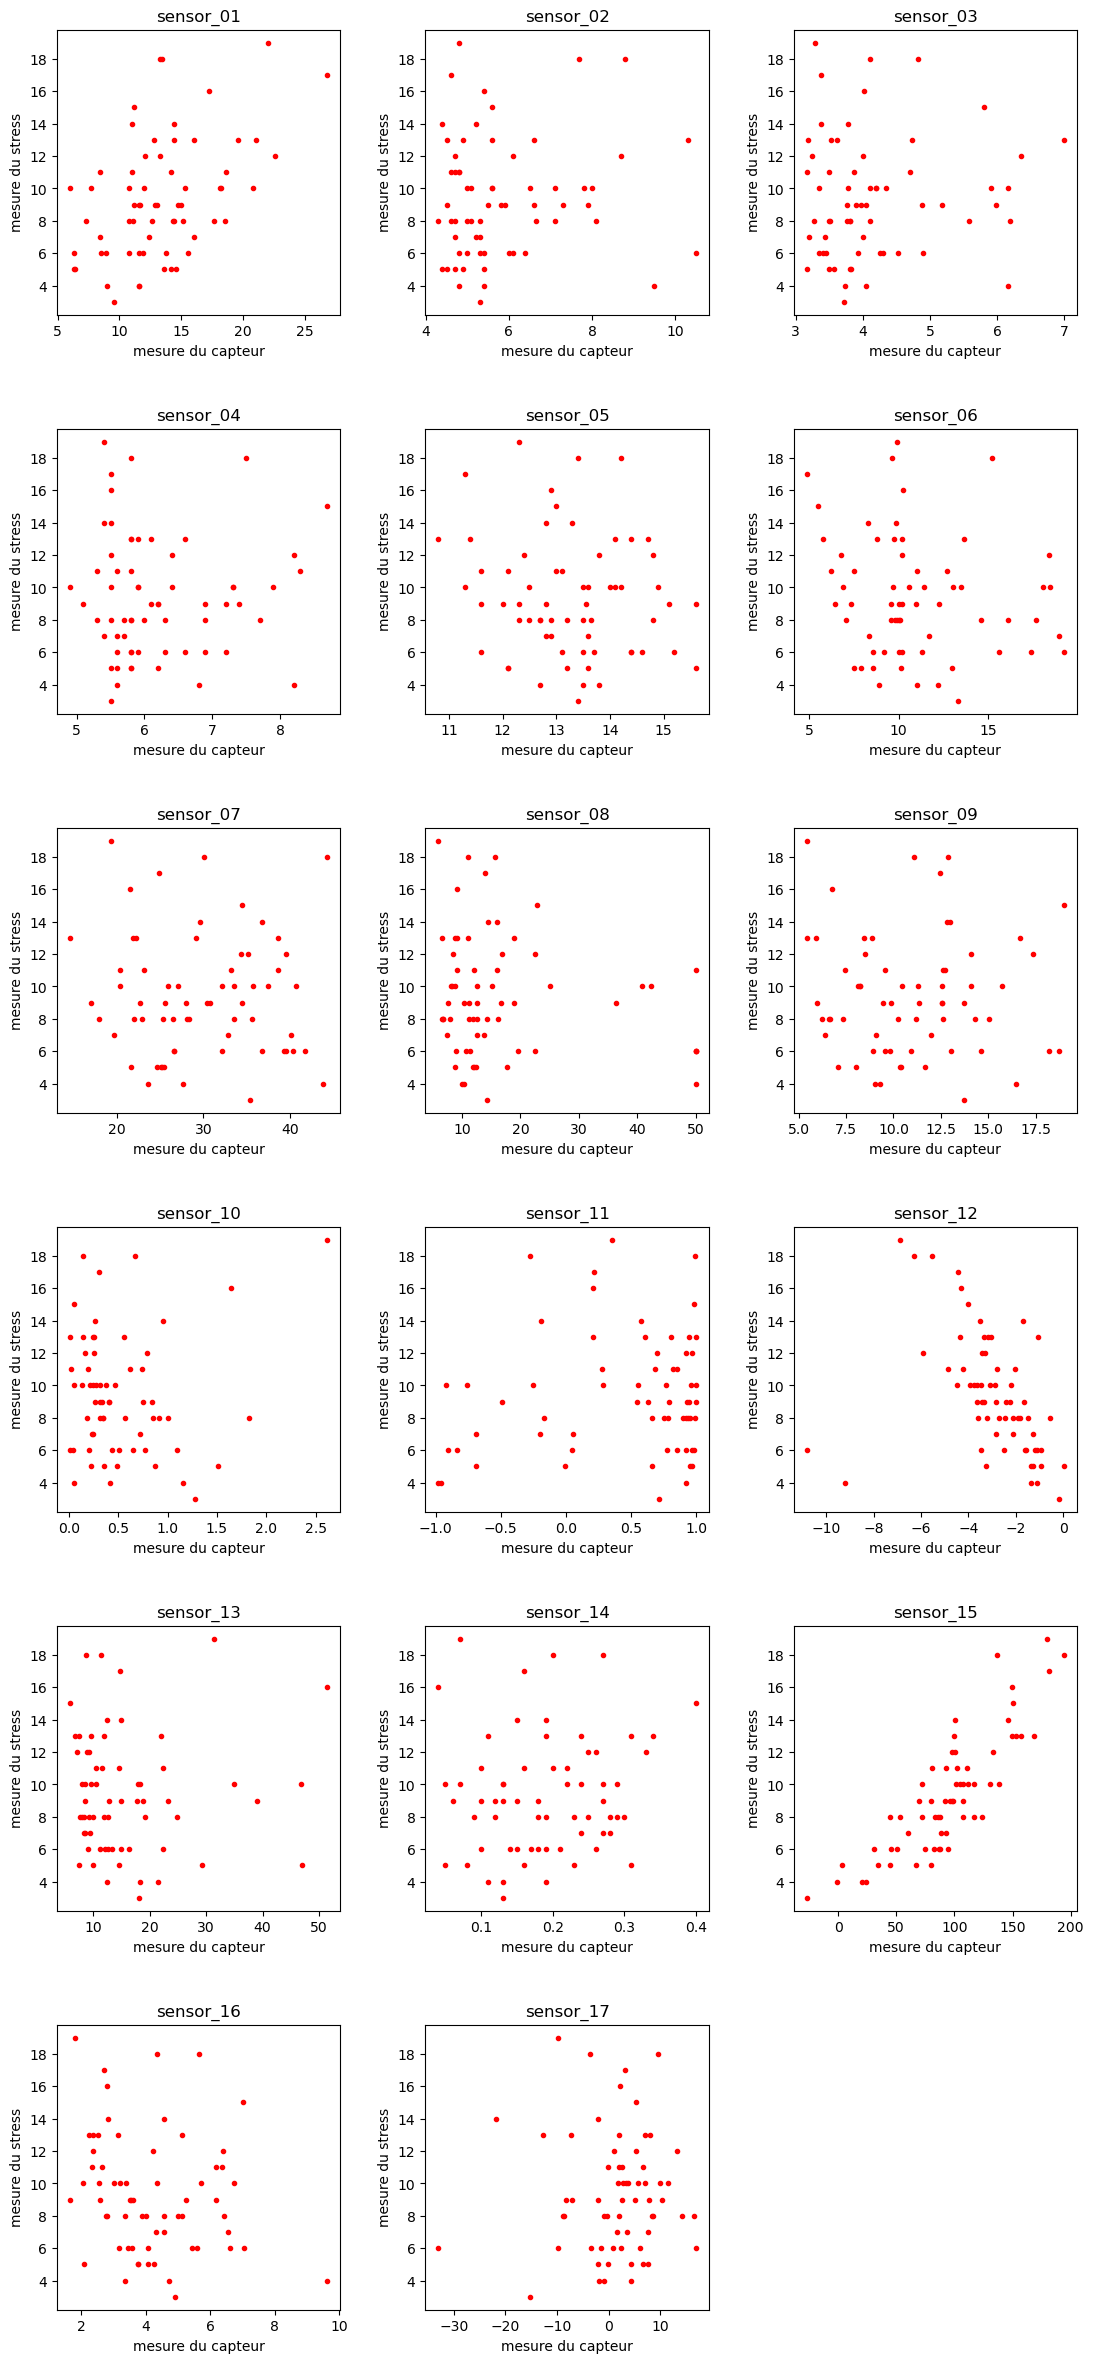

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing


sensor = pd.read_csv("E2_sensor_vals.csv", sep=";")

stress = pd.read_csv("E2_stress_vals.csv", sep=";")

print(sensor.head())
print(stress.head())
print(f'nombre de mesure de stress : {stress.size}')

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(12, 12))
axes = axes.flatten()

for i, column in  enumerate(sensor.columns) :
    figure = plt.figure()
    axes[i].plot(sensor[column],stress,'r.')
    axes[i].set_xlabel('mesure du capteur')
    axes[i].set_ylabel('stress')
    axes[i].set_title(column)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.subplots_adjust(
    left=0.1,
    right=0.95,
    top=2,
    bottom=0.1,
    wspace=0.3,
    hspace=0.4
)
plt.show()


>Les capteurs 1, 12 et 15 semblent êtres plus pertinents. En effet, ils presentent une relation linéaire.


### QUESTION 2.2
On se demande s'il est possible de prédire le niveau de stress à partir d'**une seule** des variables *sensor_01*, *sensor_12* ou *sensor_15*.


#### QUESTION 2.2.1

Effectuez une régression linéaire simple entre chacune de ces trois variables et le niveau de stress. Quelle stratégie de validation croisée vous semble être la plus adaptée sur ce jeu de données ?

*Réponse:*
>En raison du faible nombre d'observations (n = 64). Nous avons choisi d'utiliser la méthode de validation croisée *leave-one-out* pour sa robustesse dans ce cadre.


#### QUESTION 2.2.2

Peut-on statistiquement affirmer qu'il existe une relation significative entre le niveau de stress et (indépendament) *sensor_01*, *sensor_12* ou bien *sensor_15* ? Si oui, décrivez votre procédure de test.


*Réponse ci-après:*

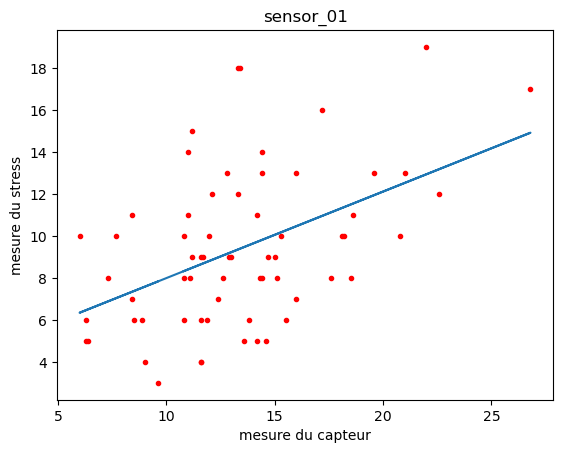

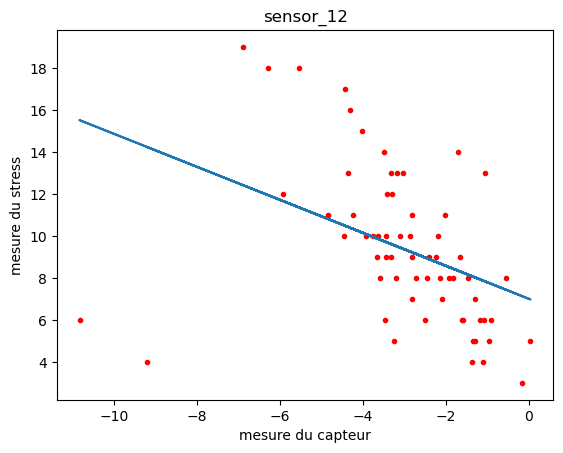

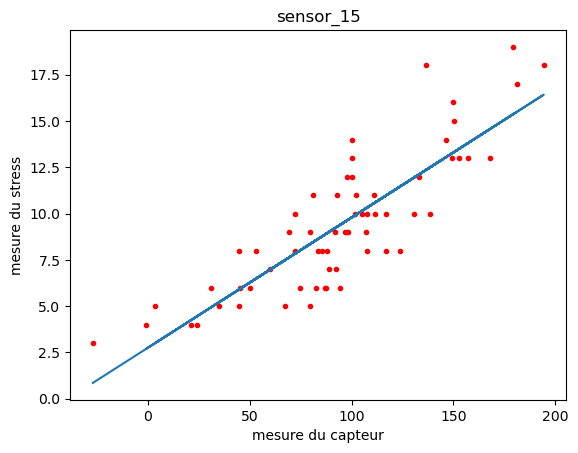

MSE sensor_01 : 11.152054867573712
MSE sensor_12 : 14.147018839840591
MSE sensor_15 : 4.329487596783642


In [18]:
#Question 2.2.1
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

important_sensors = ['sensor_01','sensor_12','sensor_15']
for column in important_sensors :
    ml = LinearRegression()
    X = sensor[[column]].values
    y = stress.values
    ml.fit(X,y)
    plt.plot(X,y,'r.')
    plt.plot(X,ml.predict(X))
    plt.xlabel('mesure du capteur')
    plt.ylabel('mesure du stress')
    plt.title(column)
    plt.show()

n = stress.size

ml = LinearRegression()
kf = KFold(n_splits=n,shuffle=False)

MSE = 0

for column in important_sensors :
    X = sensor[[column]].values
    y = stress.values
    for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            ml.fit(X_train,y_train)
            y_pred_lasso = ml.predict(X_test)
            MSE += mean_squared_error(y_test, y_pred_lasso)

    MSE = MSE/n
    print(f'MSE {column} : {MSE}')

In [ ]:
import statsmodels.api as sm

def test_stat_OLS(stress,n_sensor) :
    X = sm.add_constant(sensor[n_sensor])  # ajoute l'intercept
    model = sm.OLS(y, X).fit()
    print()
    print("=== test statistique de l'OLS sur "+n_sensor+" ===")
    #print(model.summary())
    pvalue = model.pvalues[n_sensor]
    print("p-value :", pvalue)
    if pvalue < 0.005 : 
        print("relation significative avec le stress")
    else :
        print("pas de realation significative avec le stress")

test_stat_OLS(stress,"sensor_01")
test_stat_OLS(stress,"sensor_12")
test_stat_OLS(stress,"sensor_15")


=== test statistique de l'OLS sur sensor_01 ===
p-value : 8.86681285465201e-05
relation significative avec le stress

=== test statistique de l'OLS sur sensor_12 ===
p-value : 0.0008356908272695697
relation significative avec le stress

=== test statistique de l'OLS sur sensor_15 ===
p-value : 1.4948948464174407e-18
relation significative avec le stress

=== test statistique de l'OLS sur sensor_02 ===
p-value : 0.48293236283719365
pas de realation significative avec le stress


On analyse les résultats des tests statistiques. 

Ici, notre hypothèse $H_0$ est qu'il n'y a pas de relation linéaire entre le niveau de stress et la mesure du capteur. On cherche à la rejeter. Pour ce faire on va tester si la p-valeur est inférieur à 0.005.

>Les résultats des tests statistiques ci-dessus nous permettent de conclure que les **capteurs 1 et 12** sont ceux qui nous permettent de rejeter $H_0$, c'est-à-dire que ces deux capteurs sont ceux qui exhibent une relation linéaire entre la mesure et le stress.


### QUESTION 2.3

On s'intéresse maintenant au lien entre la variable *sensor_12* et le niveau de stress. On peut remarquer qu'il semble exister une relation linéaire entre ces variables, mais que les données contiennent aussi deux valeurs aberrantes.


#### QUESTION 2.3.1

**Stratégie 1** : Quelle stratégie utiliseriez vous pour détecter automatiquement des données aberrantes dans un jeu de données ?

**Reponse:**
>Afin de déterminer les points qui seraient potentiellement des outilers nous pourrions utiliser la metrique de la distance de Cook.

**Note perso**: Faudrait savoir quelle est la valeur seuil pour la distance de Cook

#### QUESTION 2.3.2

**Stratégie 2** : Nous allons ici utiliser toutes les observations pour l'apprentissage du modèle linéaire et sa validation. En supposant que les erreurs de prédiction suivent une loi normale centrée, pourrait-on aussi détecter les outliers à partir d'un test d'hypothèse. Si oui, décrivez la procédure.


**Réponse:**

Nous avons choisi de détecter les outliers à partir d'un test d'hypothèse :
1. Calculer l'erreur de prédiction
2. Estimer leur variance $\sigma^2$
3. Pour chaque erreur $e_i$, calculer son score $z_i = \sigma/e_i$
4. Sous l'hypothèse, on estime qu'une mesure est un outlier si $|z_i|>2$ : L'erreur appartient alors au 10% des mesures les plus extremes.

détection des outliers de sensor_12 à 2 sigma
simgma estimé : 3.387975701436111
la mesure d'indindice 2 est un outlier : z = [2.80781276]
la mesure d'indindice 62 est un outlier : z = [3.02307332]


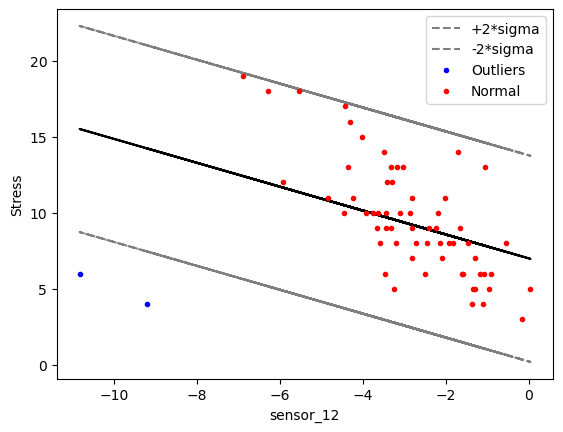

In [17]:
def outliers(stress, n_sensor,how_many_sigmas = 2)  :

    print(f"détection des outliers de {n_sensor} à {how_many_sigmas} sigma")
    ml = LinearRegression()
    X = sensor[[n_sensor]].values
    y = stress.values
    ml.fit(X,y)
    errors = y - ml.predict(X)

    sigma = np.std(errors, ddof=1)
    print(f"simgma estimé : {sigma}")
    outliers = []
    for i,e in enumerate(errors) :
        z = abs(e/sigma)
        if z > how_many_sigmas :
            print(f"la mesure d'indindice {i} est un outlier : z = {z}")
            outliers.append(True)
        else : 
            outliers.append(False)

    X_vals = X.flatten()
    y_vals = y.flatten()
    outliers_bool = np.array(outliers)
    plt.plot(X,ml.predict(X) + how_many_sigmas*sigma, "--k", alpha=0.5,label=f"+{ how_many_sigmas}*sigma")
    plt.plot(X,ml.predict(X) - how_many_sigmas*sigma, "--k", alpha=0.5,label=f"-{ how_many_sigmas}*sigma")
    plt.plot(X,ml.predict(X),'k-')
    plt.plot(X_vals[outliers_bool], y_vals[outliers_bool], "b.", label="Outliers")
    plt.plot(X_vals[~outliers_bool], y_vals[~outliers_bool], "r.", label="Normal")
    plt.xlabel(n_sensor)
    plt.ylabel("Stress")
    plt.legend()
    plt.show()

    return outliers

outliers = outliers(stress,"sensor_12")



### QUESTION 2.4


Nous supprimerons dans cette question les deux observations qui sont aberrantes sur la variable *sensor_12*.

Nous souhaitons maintenant sélectionner automatiquement un nombre réduit, mais supérieur à 1, de capteurs qui nous permettraient de prédire au mieux le niveau de stress. Nous allons pour cela utiliser la régression multiple avec un terme de régularisation.

#### QUESTION 2.4.1

Avant d'effectuer une régression linéaire régularisée, il est vivement conseillé d'effectuer une étape de centrage réduction des données. Pourquoi ?

**Réponse:**

 >Le centrage permet d'interpreter convenablement l'ordonnée à l'origine comme la valeur que l'on peut attendre si toutes les variables explicatives centrées atteignent leur moyenne.


#### QUESTION 2.4.2

Décrivez votre démarche de sélection de variables et vos résultats. Est-ce que l'utilisation des données capteurs vous semble fiable ? 


#### QUESTION 2.4.3

Quelle démarche auriez-vous pour rendre compte des résultats de cette étude sachant que les données contenaient tout de même deux outliers ?



**Réponse:**

> Afin de supprimer l'effet de ces outilers nous pouvons refaire tourner nos calculs en ignorant ces deux données car la mesure de leur score $Z$ donnait une valeur supérieure à 2, confortant notre intuition sur le fait qu'il s'agit de valeurs extrêmes.